In [1]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [2]:
import pandas as pd

MFTD_df = pd.read_pickle('Downloads/MFTD_en_exploded_w_LF.pkl')

In [31]:
import os

PATH = 'Downloads/Longformer Embedding (3-9-2021)/'
PATH = 'Downloads/sbert_linear/'

li = []
with os.scandir(PATH) as path:
    for file in path:
        df = pd.read_pickle(file.path)
        li.append(df)

In [32]:
REDDIT_df = pd.concat(li)

In [33]:
REDDIT_df

,created_utc,id,score,selftext,subreddit,title,title_language,selftext_language,SBert_avg
0,1409957310,2flbil,2.0,"Estaba navegando en Internet, Youtube, mirando...",Miedo,Navegando en Internet me pasó esto..,es,es,"[0.019935634, 0.10604113, 0.13675542, 0.013185..."
1,1410722662,2ge41r,5.0,"Hola, soy nuevo en esta comunidad. Dejando de ...",Miedo,Te ha pasado alguna vez...?,pt,es,"[0.071122155, 0.1450815, 0.1928439, -0.0158956..."
2,1466122462,4ogjj8,2.0,"Bueno, esto fue un sueño que tuve esta noche, ...",Miedo,La pesadilla de la pasada noche.,es,es,"[-0.00057334336, 0.11331456, 0.20425059, 0.045..."
3,1467309221,4qn0jq,2.0,Hola. seré breve en mis intenciones. Redacto m...,Miedo,Holders,da,es,"[0.010196271, 0.08714812, 0.18072675, 0.007049..."
4,1473193543,51h8zj,2.0,(Es la primera vez que posteo aquí así que dis...,Miedo,Mi experiencia en un cibercafe,es,es,"[0.0016516352, 0.071714684, 0.19954623, -0.011..."
...,...,...,...,...,...,...,...,...,...
92762,1591451695,gxrepo,1.0,YALL WHITE BOYS BE ACTING OUT LIKE FAGGOTS AND...,confessions,U WHITE BOYS BE FUCKING UP SO NOW U GINA GET R...,de,en,"[0.10868391, -0.083309345, -0.030826354, -0.00..."
92763,1591452631,gxro4y,1.0,Oh and I find my sister sexually attractive*\n...,confessions,"Whenever I hear something about Steve Jobs, I ...",en,en,"[0.09061238, -0.022215057, 0.10685589, 0.17091..."
92764,1591453411,gxrvrz,1.0,I'm thinking of raping a woman I know but I'm ...,confessions,Should I rape her?,en,en,"[0.015461269, 0.116598174, -0.10451262, -0.042..."
92765,1591453823,gxrzxh,1.0,"So when I do have sex, there is no pressure or...",confessions,I tell girls I'm a virgin,it,en,"[-0.058754776, 0.13917665, 0.011371899, -0.013..."


In [25]:
REDDIT_df_small = REDDIT_df.sample(20000)
REDDIT_df_small_index = REDDIT_df_small.index.to_numpy()

In [6]:
MFTD_X = np.concatenate(MFTD_df['LF pooler output'].to_numpy())
MFTD_y = MFTD_df['ATU'].to_numpy()

<IPython.core.display.Javascript object>

In [7]:
REDDIT_small_X = np.concatenate(REDDIT_df_small['LF pooler output'].to_numpy())

<IPython.core.display.Javascript object>

In [8]:
small_X = np.concatenate([MFTD_X, REDDIT_small_X])

<IPython.core.display.Javascript object>

In [34]:
# REDDIT_X = np.concatenate(REDDIT_df['LF pooler output'].to_numpy())
REDDIT_X = np.stack(REDDIT_df['SBert_avg'].to_numpy())

<IPython.core.display.Javascript object>

In [35]:
REDDIT_y = REDDIT_df['subreddit'].to_numpy()

In [36]:
REDDIT_y

array(['Miedo', 'Miedo', 'Miedo', ..., 'confessions', 'confessions',
       'confessions'], dtype=object)

In [37]:
from sklearn.preprocessing import StandardScaler

reddit_X_stded = StandardScaler().fit_transform(REDDIT_X)

In [38]:
from sklearn.decomposition import PCA
n = 2
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(reddit_X_stded)
principalDf = pd.DataFrame(data = principalComponents, columns = [f"PC{i+1}" for i in range(n)])

In [39]:
pca.explained_variance_ratio_.sum()

0.10815751325514732

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 3600x2700 with 0 Axes>

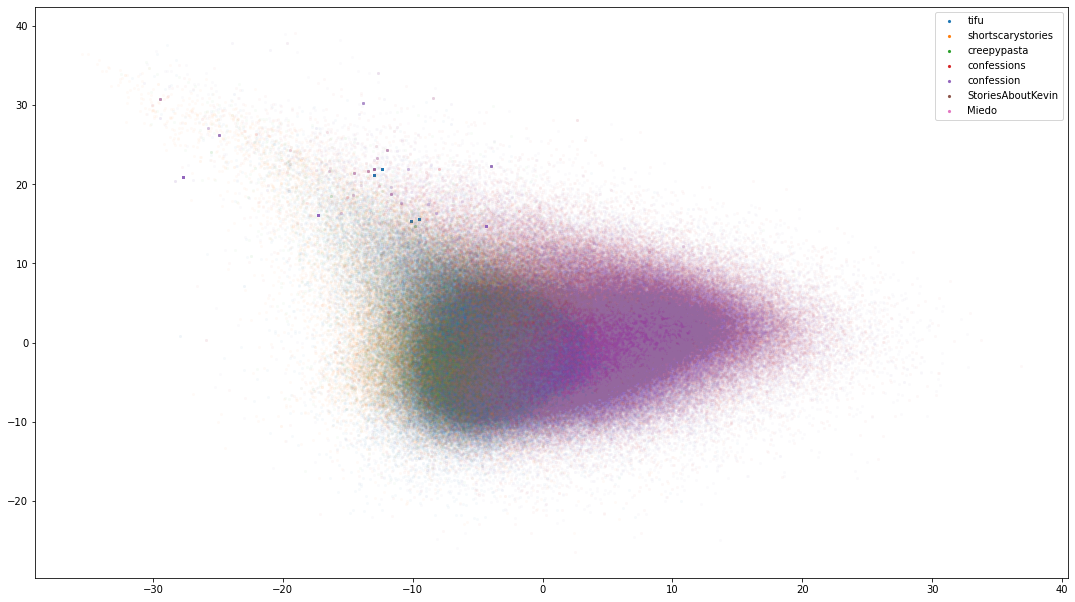

In [41]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D

figure(figsize=(12, 9), dpi=300)

fig, ax = plt.subplots()

scatter_x = principalDf.iloc[:,0].to_numpy()
scatter_y = principalDf.iloc[:,1].to_numpy()

cdict = {'Miedo': "blue",
         'StoriesAboutKevin': "orange",
         'confession': "green",
         'confessions': "red",
         'creepypasta': "purple",
         'nosleep': "brown",
         'self': "pink",
         'shortscarystories': "olive",
         'tifu': "cyan"}

plot_kwds = {'alpha' : 0.03, 'linewidths':0, 's': 10}

group = REDDIT_y
for g in sorted(np.unique(group), reverse=True):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], ec=cdict[g], label=g, **plot_kwds)
    
def update(handle, orig):
    handle.update_from(orig)
    handle.set_alpha(1)

ax.legend(handler_map={PathCollection : HandlerPathCollection(update_func= update)})
fig.set_size_inches(18.5, 10.5)
plt.savefig('Downloads/2.jpg', dpi =100)
plt.show()

In [25]:
principalDf.iloc[:,0].to_numpy()

array([ 14.41601  ,  -5.3461285, -17.747412 , ...,   5.1889176,
        20.961687 ,   0.6430043], dtype=float32)

In [52]:
np.unique(group)

<IPython.core.display.Javascript object>

array(['Miedo', 'StoriesAboutKevin', 'confession', 'confessions',
       'creepypasta', 'nosleep', 'self', 'shortscarystories', 'tifu'],
      dtype=object)

# HDBSCAN Clustering

In [312]:
from sklearn.preprocessing import StandardScaler

small_X_stded = StandardScaler().fit_transform(small_X)

In [313]:
from sklearn.decomposition import PCA
n = 2
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(small_X_stded)
principalDf = pd.DataFrame(data = principalComponents, columns = [f"PC{i+1}" for i in range(n)])

In [314]:
principalDf.to_numpy()

array([[-6.1778255 , 20.586983  ],
       [ 0.03586078, 24.173903  ],
       [ 4.218406  , 24.048433  ],
       ...,
       [14.746625  , -3.2879612 ],
       [-5.513963  , -3.494714  ],
       [16.329819  , -6.5336127 ]], dtype=float32)

In [315]:
pca.explained_variance_ratio_.sum()

0.32235092

In [316]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=10)


In [317]:
clusterer.fit(principalDf.to_numpy())

HDBSCAN(min_cluster_size=200, min_samples=10)

In [318]:
clusterer.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [319]:
len(set(clusterer.labels_))

3

In [320]:
clusterer.probabilities_

array([1.        , 1.        , 1.        , ..., 0.91874394, 1.        ,
       0.94318539])

In [321]:
# clusterer.single_linkage_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

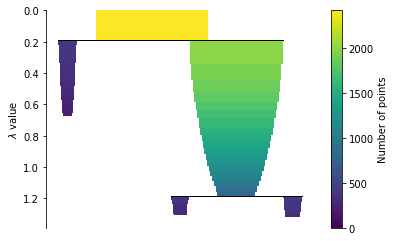

In [322]:
clusterer.condensed_tree_.plot()

In [323]:
from sklearn.cluster import DBSCAN
import numpy as np
X= principalDf.to_numpy()
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [324]:
len(set(clustering.labels_))

8

In [325]:
clustering.components_

array([[-6.1778255 , 20.586983  ],
       [ 0.03586078, 24.173903  ],
       [ 4.218406  , 24.048433  ],
       ...,
       [14.746625  , -3.2879612 ],
       [-5.513963  , -3.494714  ],
       [16.329819  , -6.5336127 ]], dtype=float32)

In [326]:
clustering.fit_predict([[1,1,3,45,3,2,1,1]])

array([-1])

# LDA

In [327]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(MFTD_X, MFTD_y)

LinearDiscriminantAnalysis()

In [328]:
clf.predict(REDDIT_small_X)

array(['37', '050A', '37', ..., '38', '281', '281'], dtype='<U5')

In [329]:
REDDIT_df_small.loc[REDDIT_df_small.index[-3], 'selftext']

"Note: Posted on the day it occurred, but removed due to rule 3. Posting on the weekend now.\n\nLike many good TIFUs, this one all started out on the toilet. A casual night playing games and browsing reddit took a turn for the worse, when I turned down my hall into the lavatory. Starting out as fine as always (No doubt thanks to my healthy prostate), the previous days meals had caught up to me, and they demanded release. I could imagine a number of ways this could go wrong, but thankfully none applied.\n\nThere were no problems yet, as I began to clean up. An arduous but simple task, it would seem almost impossible to fuck up here. But I'm a master of the impossible. I have a habit of standing up towards the end of my wipe, as to ensure a 'clean finish'.\n\nAs I stood up however, I noticed a spider, ever so slowly climbing the side of my toilet. A daddy long legs, entirely harmless, slowly making it's way up, until it reached the seat, stealing my former position.\nUndoubtedly, he was 

In [330]:
MFTD_df[MFTD_df['ATU'] == '77']['content'].item()

"\nA stag had grown thirsty and went to a spring in order to drink some water. When he saw the reflection of his body in the water, he disparaged the slenderness of his legs but revelled in the shape and size of his horns. All of a sudden, some hunters appeared and began to chase him. As the stag ran along the level ground of the plain, he outdistanced his pursuers and beat them to the marsh by the river. Without thinking about what he was doing, the stag kept on going, but his horns became tangled in the overhanging branches and he was captured by the hunters. The stag groaned and said, 'Woe is me, wretched creature that I am! The thing that I disparaged could have saved me while I have been destroyed by the very thing I boasted about.' "

In [331]:
from sklearn.decomposition import PCA
n = 2
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(REDDIT_small_X)
principalDf = pd.DataFrame(data = principalComponents, columns = [f"PC{i+1}" for i in range(n)])

In [332]:
principalDf['LDA_label'] = clf.predict(REDDIT_small_X)
df = principalDf
df

,PC1,PC2,LDA_label
0,-0.161853,-0.049471,37
1,0.100272,-0.055426,050A
2,0.066434,-0.123118,37
3,-0.025432,-0.149826,1305B
4,0.248230,-0.031786,77
...,...,...,...
1995,0.066031,-0.177440,500
1996,0.294369,0.087403,233
1997,0.302317,0.102454,38
1998,-0.108827,0.015689,281


In [333]:
import matplotlib.pyplot as plt

for label in df['LDA_label']:
    #filter rows of original data
    filtered_label0 = df[df['LDA_label'] == label]

    #plotting the results
    plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1], color=np.random.rand(3), label=label)

plt.legend(loc='best')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f83a93d1ca0> (for post_execute):


KeyboardInterrupt: 

# K-means

In [11]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

        sse.append(curr_sse)
    return sse

In [13]:
WSS = calculate_WSS(small_X, kmax=40)

<IPython.core.display.Javascript object>

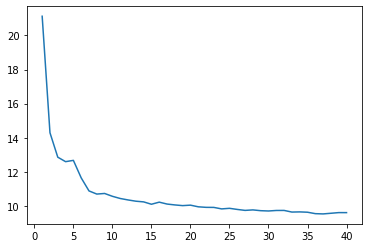

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

k = np.linspace(1,40,40)
ax.plot(k, WSS);

In [15]:
from scipy.spatial.distance import pdist, squareform

In [16]:
dis_matrix = squareform(pdist(small_X, metric='cityblock'))

In [17]:
dis_matrix

array([[ 0.        , 12.89129532, 15.31929405, ..., 16.75222843,
        18.79984527, 19.11226275],
       [12.89129532,  0.        , 13.19028291, ..., 19.41131055,
        20.28751941, 19.71085313],
       [15.31929405, 13.19028291,  0.        , ..., 19.9642089 ,
        20.46798783, 18.62081885],
       ...,
       [16.75222843, 19.41131055, 19.9642089 , ...,  0.        ,
        14.28561595, 20.75860746],
       [18.79984527, 20.28751941, 20.46798783, ..., 14.28561595,
         0.        , 16.72393121],
       [19.11226275, 19.71085313, 18.62081885, ..., 20.75860746,
        16.72393121,  0.        ]])

In [29]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=15, random_state=1, precompute_distances=True).fit(dis_matrix)
kmeans.labels_

/home/anthony/.local/share/virtualenvs/Research-Mapping-Uncanny-Valley-DSc8QBrC/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


array([ 5,  5,  5, ...,  3, 12,  4], dtype=int32)

In [30]:
kmeans.cluster_centers_

array([[20.56061865, 24.21124151, 25.42738689, ..., 17.68713083,
        21.46518791, 25.7466839 ],
       [17.56968561, 19.39086619, 19.57543855, ..., 15.94644185,
        12.7384505 , 15.02255828],
       [21.76096876, 22.07384326, 21.67207572, ..., 22.85067808,
        18.04426423, 15.57731715],
       ...,
       [16.55036765, 18.99315764, 19.39247574, ..., 13.68424432,
        12.07634535, 16.0637497 ],
       [16.10988001, 19.05355949, 19.71443177, ..., 12.19874547,
        12.70360838, 17.67401353],
       [17.23688647, 19.25389088, 20.50174264, ..., 15.2561618 ,
        16.3904401 , 19.71280425]])

In [31]:
from sklearn.preprocessing import StandardScaler

small_X_stded = StandardScaler().fit_transform(small_X)

In [40]:
from sklearn.decomposition import PCA
n = 2
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(small_X_stded)
principalDf = pd.DataFrame(data = principalComponents, columns = [f"PC{i+1}" for i in range(n)])

In [41]:
pca.explained_variance_ratio_.sum()

0.29144102

In [42]:
len(principalDf)

20416

In [43]:
principalDf['kmeans_label'] = kmeans.labels_

In [44]:
df = principalDf

In [37]:
principalDf.iloc[:416, 2] = -1 # MFTD label changed to -1

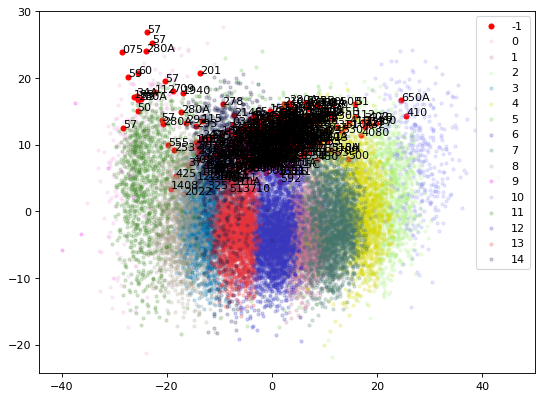

In [39]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

ATU = MFTD_df['ATU'].to_list()

for label in range(-1,15):
    #filter rows of original data
    filtered_label0 = df[df['kmeans_label'] == label]
    
    if label == -1:
#         pass
        plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1], color="red", label=-1, s=20)
    
        for i, txt in enumerate(ATU):
            plt.annotate(txt, (filtered_label0.iloc[:,0][i] , filtered_label0.iloc[:,1][i]))
    else:
        #plotting the results
        plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1], color=np.random.rand(3), label=label, s=8, alpha=0.2)
    
plt.legend(loc='best')
plt.savefig('Downloads/1.jpg')
plt.show()

50, 280A, 075, 59

In [422]:
indices = df[df['kmeans_label'].isin([3,9])].index-416

In [427]:
reddit_may_atu = REDDIT_df_small.iloc[indices,:][['selftext']]

In [428]:
reddit_may_atu['selftext'].astype(str)

36854     I've been using reddit for over a year now and...
125567    Man, I really fucked up. \n\nI procrastinate a...
122511                                 Opinions are welcome
19751     "I want to tell you something Alice"  \n"What?...
29226              Lay on the floor or turn up some music ?
                                ...                        
176824    Forgive me father for I have sinned I killed t...
69063     Few minutes ago this mustang passed me and he ...
54276     That feel when life's not fair.\n\nThat feel w...
38623     It really sucks when you feel like you actuall...
62495     2 of the most unfortunate events in American H...
Name: selftext, Length: 251, dtype: object

In [431]:
with open('Downloads/output.txt', 'w') as f:
    for text in reddit_may_atu['selftext'].tolist():
        f.write(text + '\n\n------------------\n\n')